<a href="https://colab.research.google.com/github/TonyMB17/Pokemon/blob/main/Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import pandas as pd #libreria especializada en el manejo y análisis de estructuras de datos.
pokemon = pd.read_csv('pokemon.csv')

In [166]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [167]:
pd.unique(pokemon['Legendary'])#Mostrando los valores de pokemon legendario

array([False,  True])

In [168]:
pokemon.isna().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [169]:
#pokemon faltante
print(pokemon[pokemon['Name'].isnull()])

     # Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
62  63  NaN  Fighting    NaN  65     105       60       60       70     95   

    Generation  Legendary  
62           1      False  


In [170]:
print(pokemon['Name'][61])
print(pokemon['Name'][pokemon['Name'].isnull()])
print(pokemon['Name'][63])

Mankey
62    NaN
Name: Name, dtype: object
Growlithe


In [171]:
pokemon['Name'][62] = "Primeape" #llenando el campo con el naombre del pokemon faltante

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [172]:
#llenando los datos con null, 
pokemon["Type 2"]=pokemon["Type 2"].fillna("null")

In [173]:
pokemon.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [174]:
# Tomando columnas importantes
pokemon=pokemon[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary']] 

# Este elimina las filas que tengan algun nulo, dropna elimina datos nulos
pokemon=pokemon.dropna() 
#Luego eliminados los duplicados
pokemon=pokemon.drop_duplicates() 

In [175]:
pokemon.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,45,49,49,65,65,45,False
1,60,62,63,80,80,60,False
2,80,82,83,100,100,80,False
3,80,100,123,122,120,80,False
4,39,52,43,60,50,65,False


In [176]:
pokemonDatax=pokemon[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]  #los datax son las datos de entradas
pokemonDatay=pokemon[['Legendary']] #datay son los datos de salida
print(pokemonDatay.head(),"\n", pokemonDatax.head())  #mostrar 

   Legendary
0      False
1      False
2      False
3      False
4      False 
    HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0  45      49       49       65       65     45
1  60      62       63       80       80     60
2  80      82       83      100      100     80
3  80     100      123      122      120     80
4  39      52       43       60       50     65


In [177]:
pokemon.describe() #El método se utiliza para calcular algunos datos estadísticos 

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,69.168164,79.021823,73.657253,72.287548,71.653402,67.761232
std,25.589979,32.646400,31.375565,32.720001,27.891371,29.067415
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,48.000000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,94.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [178]:
#se divide en intervalos
pd.cut(pokemonDatax['HP'],[0,20,40,60,80,100,120,140,160,180,200,220,240,260])

0      (40, 60]
1      (40, 60]
2      (60, 80]
3      (60, 80]
4      (20, 40]
         ...   
795    (40, 60]
796    (40, 60]
797    (60, 80]
798    (60, 80]
799    (60, 80]
Name: HP, Length: 779, dtype: category
Categories (13, interval[int64, right]): [(0, 20] < (20, 40] < (40, 60] < (60, 80] < ... <
                                          (180, 200] < (200, 220] < (220, 240] < (240, 260]]

In [179]:
#remplazando el valor de pokemonDatax por los intervalos HP
pokemonDatax['HP']=pd.cut(pokemonDatax['HP'],[0,20,40,60,80,100,120,140,160,180,200,220,240,260])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [180]:
pd.cut(pokemonDatax['Attack'],[0,20,40,60,80,100,120,140,160,180,200])

0        (40, 60]
1        (60, 80]
2       (80, 100]
3       (80, 100]
4        (40, 60]
          ...    
795     (80, 100]
796    (140, 160]
797    (100, 120]
798    (140, 160]
799    (100, 120]
Name: Attack, Length: 779, dtype: category
Categories (10, interval[int64, right]): [(0, 20] < (20, 40] < (40, 60] < (60, 80] < ... <
                                          (120, 140] < (140, 160] < (160, 180] < (180, 200]]

In [181]:
#remplazando el valor de pokemonDatax por los intervalos HP
pokemonDatax['Attack']=pd.cut(pokemonDatax['Attack'],[0,20,40,60,80,100,120,140,160,180,200])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [182]:
pd.cut(pokemonDatax['Defense'],[0,20,40,60,80,100,120,140,160,180,200,220,240])#dando intervalo de Defense 230

0        (40, 60]
1        (60, 80]
2       (80, 100]
3      (120, 140]
4        (40, 60]
          ...    
795    (140, 160]
796    (100, 120]
797      (40, 60]
798      (40, 60]
799    (100, 120]
Name: Defense, Length: 779, dtype: category
Categories (12, interval[int64, right]): [(0, 20] < (20, 40] < (40, 60] < (60, 80] < ... <
                                          (160, 180] < (180, 200] < (200, 220] < (220, 240]]

In [183]:
#remplazando el valor de pokemonDatax por los intervalos Defense
pokemonDatax['Defense']=pd.cut(pokemonDatax['Defense'],[0,20,40,60,80,100,120,140,160,180,200,220,240])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [184]:
pd.cut(pokemonDatax['Sp. Atk'],[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])

0        (60, 70]
1        (70, 80]
2       (90, 100]
3      (120, 130]
4        (50, 60]
          ...    
795     (90, 100]
796    (150, 160]
797    (140, 150]
798    (160, 170]
799    (120, 130]
Name: Sp. Atk, Length: 779, dtype: category
Categories (19, interval[int64, right]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] < ... <
                                          (160, 170] < (170, 180] < (180, 190] < (190, 200]]

In [185]:
#remplazando el valor de pokemonDatax por los intervalos Sp. Atk
pokemonDatax['Sp. Atk']=pd.cut(pokemonDatax['Sp. Atk'],[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [186]:
pd.cut(pokemonDatax['Sp. Def'],[20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230])

0        (60, 70]
1        (70, 80]
2       (90, 100]
3      (110, 120]
4        (40, 50]
          ...    
795    (140, 150]
796    (100, 110]
797    (120, 130]
798    (120, 130]
799      (80, 90]
Name: Sp. Def, Length: 779, dtype: category
Categories (21, interval[int64, right]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < ... <
                                          (190, 200] < (200, 210] < (210, 220] < (220, 230]]

In [187]:
pokemonDatax['Sp. Def']=pd.cut(pokemonDatax['Sp. Def'],[20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [188]:
pd.cut(pokemonDatax['Speed'],[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180])

0        (40, 50]
1        (50, 60]
2        (70, 80]
3        (70, 80]
4        (60, 70]
          ...    
795      (40, 50]
796    (100, 110]
797      (60, 70]
798      (70, 80]
799      (60, 70]
Name: Speed, Length: 779, dtype: category
Categories (18, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < ... <
                                          (140, 150] < (150, 160] < (160, 170] < (170, 180]]

In [189]:
pokemonDatax['Speed']=pd.cut(pokemonDatax['Speed'],[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [190]:
pokemonDatax.head(10) #mostrando elementos

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,"(40, 60]","(40, 60]","(40, 60]","(60, 70]","(60, 70]","(40, 50]"
1,"(40, 60]","(60, 80]","(60, 80]","(70, 80]","(70, 80]","(50, 60]"
2,"(60, 80]","(80, 100]","(80, 100]","(90, 100]","(90, 100]","(70, 80]"
3,"(60, 80]","(80, 100]","(120, 140]","(120, 130]","(110, 120]","(70, 80]"
4,"(20, 40]","(40, 60]","(40, 60]","(50, 60]","(40, 50]","(60, 70]"
5,"(40, 60]","(60, 80]","(40, 60]","(70, 80]","(60, 70]","(70, 80]"
6,"(60, 80]","(80, 100]","(60, 80]","(100, 110]","(80, 90]","(90, 100]"
7,"(60, 80]","(120, 140]","(100, 120]","(120, 130]","(80, 90]","(90, 100]"
8,"(60, 80]","(100, 120]","(60, 80]","(150, 160]","(110, 120]","(90, 100]"
9,"(40, 60]","(40, 60]","(60, 80]","(40, 50]","(60, 70]","(40, 50]"


In [191]:
#muestra los duplicados dentro del dataX
pokemonDatax.duplicated(keep=False) 

0      False
1       True
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Length: 779, dtype: bool

In [192]:
#son un tipo de datos pandas correspondientes a variables categóricas en estadísticas
from pandas.core.arrays import categorical #valor categorico, toman una variable limitada
pokemonDatax.loc[:,'HP'],categoriaHP=pd.factorize(pokemonDatax['HP'],sort=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [193]:
pokemonDatax.loc[:,'Attack'],categoriaAttack=pd.factorize(pokemonDatax['Attack'],sort=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [194]:
pokemonDatax.loc[:,'Defense'],categoriaDef=pd.factorize(pokemonDatax['Defense'],sort=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [195]:
pokemonDatax.loc[:,'Sp. Atk'],categoriaSA=pd.factorize(pokemonDatax['Sp. Atk'],sort=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [196]:
pokemonDatax.loc[:,'Sp. Def'],categoriaSD=pd.factorize(pokemonDatax['Sp. Def'],sort=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [197]:
pokemonDatax.loc[:,'Speed'],categoriaSp=pd.factorize(pokemonDatax['Speed'],sort=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [198]:
pokemonDatax.head(10)  

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,2,2,2,5,4,4
1,2,3,3,6,5,5
2,3,4,4,8,7,7
3,3,4,6,11,9,7
4,1,2,2,4,2,6
5,2,3,2,6,4,7
6,3,4,3,9,6,9
7,3,6,5,11,6,9
8,3,5,3,14,9,9
9,2,2,3,3,4,4


In [199]:
#Normalizar los datos
from sklearn.preprocessing import StandardScaler

In [200]:
scaler=StandardScaler()    #calcula el valor medio y varianza de las características
scaler.fit(pokemonDatax)     #calcula la media para poder hacer la transformaciom
print(scaler.mean_)   

[2.83568678 3.36071887 3.06803594 5.51604621 4.4338896  6.06418485]


In [201]:
#Ajuste a los datos y luego transfórmelos.
pokemonDatax=scaler.fit_transform(pokemonDatax)  
pokemonDatax

array([[-0.64916416, -0.82764726, -0.68183529, -0.15755922, -0.15913226,
        -0.70634257],
       [-0.64916416, -0.2194046 , -0.04343422,  0.14776076,  0.20762523,
        -0.36415298],
       [ 0.12763904,  0.38883805,  0.59496685,  0.75840074,  0.94114022,
         0.3202262 ],
       ...,
       [ 0.12763904,  0.99708071, -0.68183529,  2.28500068,  2.04141271,
        -0.02196339],
       [ 0.12763904,  2.21356602, -0.68183529,  2.89564065,  2.04141271,
         0.3202262 ],
       [ 0.12763904,  0.99708071,  1.23336793,  1.6743607 ,  0.57438273,
        -0.02196339]])

In [202]:
# implementa la mayoría de las funcionalidades necesarias para crear y utilizar modelos PCA.
from sklearn.decomposition import PCA

In [203]:
# Instanciamos objeto PCA y aplicamos
# pca, metodo pa simplificar la informacion
pca = PCA(n_components=6)     #depende al numero de entradas
pca.fit(pokemonDatax)           #obtiene los componentes principales
print(pca.explained_variance_ratio_)  #muestra y convierte los datos con las nuevas dimensiones del PCA

[0.43834922 0.18629584 0.13408562 0.12019477 0.07357006 0.0475045 ]


In [204]:
#combierte el dato boolean de la salida a numeros (1=true , 0 = false)
pokemonDatay.loc[:,'Legendary'],categoriAge=pd.factorize(pokemonDatay['Legendary'],sort=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


# ENTRENAMIENTO DE LA NEURONA
Se dividira los datos en 80% de entrenamientos, 20% pruebas

In [205]:
import numpy as np
from sklearn.model_selection import train_test_split #Dividir arreglos o matrices en subconjuntos aleatorios de train y test;

In [206]:
#Convierta el DataFrame en una matriz NumPy.De forma predeterminada,
# el dtype de la matriz devuelta será el dtype NumPy común de todos los tipos en el DataFrame
pokemonDatay=pokemonDatay.to_numpy() 
x_train, x_test, y_train, y_test= train_test_split(pokemonDatax, pokemonDatay, test_size=0.3) #longitud de las matrices divididas

In [207]:
# Imprime los 5 primeros valores de xtrain,xtest,ytrain y ytest
print(x_train[0:5], x_test[0:5], y_train[0:5], y_test[0:5]) 

[[ 0.12763904  0.38883805 -0.68183529  0.75840074 -0.52588976 -0.02196339]
 [-0.64916416 -0.2194046   1.23336793 -0.15755922  1.67465521  0.3202262 ]
 [ 2.45804864 -0.2194046  -0.04343422  0.75840074  0.94114022 -0.36415298]
 [-0.64916416 -0.82764726 -0.04343422 -0.7681992   0.57438273  1.00460539]
 [ 1.68124544  0.38883805  1.871769    0.45308075  3.1416852   1.34679498]] [[ 1.68124544  0.38883805 -0.04343422 -1.07351919  0.20762523  0.6624158 ]
 [-0.64916416 -2.04413257 -1.32023637 -1.68415916 -0.89264725  0.3202262 ]
 [-0.64916416  0.38883805 -0.04343422 -0.7681992  -0.89264725 -0.70634257]
 [ 0.90444224  0.38883805  1.871769    1.06372073 -0.89264725 -0.70634257]
 [ 0.12763904 -0.2194046  -0.68183529 -0.7681992   0.20762523  0.6624158 ]] [[0]
 [0]
 [0]
 [0]
 [1]] [[0]
 [0]
 [0]
 [0]
 [0]]


#funcion sigmoide

In [208]:
#  función sigmoidea es una función logística matemática, se usa comunmente en la función de activación en neuronas artificiales.
def sigmoide(x): 
  return (1.0/(1.0+np.exp(-x))) # fórmula para la función sigmoidea 
def derivada(x): 
  return sigmoide(x)*(1.0-sigmoide(x)) #derivada de la funcion sigmoide

In [209]:
#Aqui se empieza a añadir neuronas en caso de q tu error es grande
#En este caso se añade pesosCO4, tendenciasC04 (por si necesitas una neurona mas pero si necesitas mas neuronas incrementas el numero )
def neurona(entrada, pesosCO1, tendenciasC01, pesosCO2, tendenciasCO2, pesosCO3, tendenciasCO3, pesosCO4, tendenciasC04, pesosCS, tendenciasCS):
  
  entradaNetaC1=np.dot(pesosCO1, np.transpose(entrada))-tendenciasC01
  salidaC1=sigmoide(entradaNetaC1)

  entradaNetaC2 = np.dot(pesosCO2,salidaC1)-tendenciasCO2
  salidaC2=sigmoide(entradaNetaC2)

  entradaNetaC3 = np.dot(pesosCO3,salidaC2)-tendenciasCO3
  salidaC3=sigmoide(entradaNetaC3)

  #de aqui para abajo copias lo mismo de arriba y reemplazas entradaNetaC3 a entradaNetaC4, lo mismo con pesosCO3, tendenciasCO3,  salidaC3 a C04
  # (pesosCO3,salidaC2) AQUI! salidaC2 cambia a salidaC3... es tomar la salida de la anterior neurona
  entradaNetaC4 = np.dot(pesosCO4,salidaC3)-tendenciasC04
  salidaC4=sigmoide(entradaNetaC4)


  entradaNetaCS = np.dot(pesosCS,salidaC4)-tendenciasCS  #aqui la salidaC3 lo cambias por la salida de la ultima neurona q has agregado 
  salida=sigmoide(entradaNetaCS) 

  return salida, entradaNetaCS, entradaNetaC4, entradaNetaC3, entradaNetaC2, entradaNetaC1   #aqui agregas otra entradaNetaCx   #x=neurona q agregastes
# el algoritmo recibe
# FacorAprendizaje: que tanto se permite el cambio en los pesos w(t) = e*error'f'(neta)*xj
# error: un valor de error que permitimos
# entradas: el conjunto de entradas que se van a trabajar 
# salidas: salidas esperadas
# max-it: el numero de iteraciones que prmitimos
# alpha: el valor de incremento del factor de aprendzaje
# rho: El valor de decremento del factor de aprendizaje
# neuronasC1: numero de neuronas en la capa oculta 1
# neuronasC2: numero de neuronas en la capa oculta 2
# neuronasC3: numero de neuronas en la capa oculta 3
def backpropagation(entradas, salidas,factorAprendizaje, error, max_it, alpha, rho, neuronasC1, neuronasC2, neuronasC3, neuronasC4):#aqui agregas las neuronas vas agregar por ejem neuronaC4

  # tiene 4 neuronas y como tres entradas tenemos una matriz de 4x3
  pesosCO1=2*np.random.rand(neuronasC1,entradas.shape[1])-1
  tendenciasC1=2*np.random.rand(neuronasC1)-1

  # pesos capa oculta 2
  # la capa oculta 2 tiene 2 neuronas y recive las salidas de 3 neuronas en la capa oculta 1
  # genera una matriz de 2x3
  pesosCO2=2*np.random.rand(neuronasC2,neuronasC1)-1
  tendenciasC2=2*np.random.rand(neuronasC2)-1

  # capa oculta 3
  pesosCO3=2*np.random.rand(neuronasC3,neuronasC2)-1
  tendenciasC3=2*np.random.rand(neuronasC3)-1

  #AQUI abajo AGREGAS OTRA CAPA, copias el codigo q arriba y cambias pesosC03, tendeciasC3, neuronasC3 por C4 
  # (neuronasC3,neuronasC2) aqui cambias neuronasC2 por C3 

  #capa oculta 4 
  pesosCO4=2*np.random.rand(neuronasC4,neuronasC3)-1
  tendenciasC4=2*np.random.rand(neuronasC4)-1


  # Generamos los pesos de la capa de salida, 1 salida (1 neurona) y tenemos 2 entradas que vienen de la capa oculta 2
  pesosCS = 2*np.random.rand(neuronasC4)-1    #IMPORTANTE! aqui cambias neurnasC3 por la ULTIMA NEURONA q agregaste 
  tendenciasCS=2*np.random.rand(1)-1
  it=0
  errorVec=[]
  errorAnt=float('inf')
  while(it<max_it):
    it+=1
    errorIt=0
    for i in range(0, entradas.shape[0]):
      ent=entradas[i]
      t=salidas[i]
      y,entradaNetaCS, entradaNetaC4, entradaNetaC3, entradaNetaC2, entradaNetaC1=neurona(  #IMPORTANTEEE..  entradaNetaCx
          ent, pesosCO1, tendenciasC1, pesosCO2, tendenciasC2,pesosCO3, tendenciasC3, pesosCO4, tendenciasC4, pesosCS, tendenciasCS #IMPORTANTEEE..  pesosCOx, tendenciasCx
        )
#CS =capas de salidas 
      errorIt+=np.power(t-y,2)/2.0

    errorVec.append(errorIt)
    for i in range(0, entradas.shape[0]):
      ent=entradas[i]
      t=salidas[i]
      y, entradaNetaCS, entradaNetaC4, entradaNetaC3, entradaNetaC2, entradaNetaC1 = neurona(   #AQUI! agrega entradaNetaCx.. las q sigas aumentando
          ent, pesosCO1, tendenciasC1, pesosCO2, tendenciasC2, pesosCO3, tendenciasC3,pesosCO4, tendenciasC4, pesosCS, tendenciasCS   #aqui agregas pesosCO4, tendenciasC4 .. las q sigas aumentando
      )

   

      # calcular el error en la capa salida
      errorCS=(t-y)*derivada(entradaNetaCS)


      #AQUIIII.. agregas calcular la capa oculta 4 o las q agregues y copias el codigo de abajo
      #en vez de errorC3, entradaNetaC3 pones C4 o las q vas agregando

      #la ultima capa q aumentamos toma el lugar de la capa de salida 

      # calcular la capa oculta 4
      errorC4=0
      for j in range(0,pesosCS.shape[0]):
        errorC4+=pesosCS[j]*errorCS*derivada(entradaNetaC4[j])

      # calcular la capa oculta 3
      errorC3=0
      for j in range(0,pesosCO4.shape[0]):
        for k in range(0, pesosCO4.shape[1]):
          errorC3 += pesosCO4[j][k]*errorC4*derivada(entradaNetaC3[k])

      #calcular el error capa oculta 2
      errorC2=0
      for j in range(0,pesosCO3.shape[0]):
        for k in range(0, pesosCO3.shape[1]):
          errorC2 += pesosCO3[j][k]*errorC3*derivada(entradaNetaC2[k])

      #Calcular el error de la capa oculta 1
      errorC1=0
      for j in range(0, pesosCO2.shape[0]):
        for k in range(0, pesosCO2.shape[1]):
          errorC1 += pesosCO2[j][k]*errorC2*derivada(entradaNetaC1[k])

      # actualiza pesos
      # cada salida
      for j in range(0, pesosCS.shape[0]):
        pesosCS[j]+=factorAprendizaje*errorCS*entradaNetaCS

      #Actualizar las tendencias
      for j in range(0,tendenciasCS.shape[0]):
        tendenciasCS[j]+=factorAprendizaje*errorCS*(-1)


      #IMPORTANTEEEEEEEEEEEEEEEEEEEEEEEEE aumentar peso y actualizar

      #pesos capa oculta 4
      for j in range(0, pesosCO4.shape[0]): #neurona de CO4
        for k in range(0, pesosCO4.shape[1]): #Salida de la CO3
          pesosCO4[j][k]+=factorAprendizaje*errorC4*entradaNetaC4[j]
      # 
      # actualizar las tendencias 4
      for j in range(0, tendenciasC4.shape[0]):
        tendenciasC4[j]+=factorAprendizaje*errorC4*(-1)

      
      #pesos capa oculta 3
      for j in range(0, pesosCO3.shape[0]): #neurona de CO3
        for k in range(0, pesosCO3.shape[1]): #Salida de la CO2
          pesosCO3[j][k]+=factorAprendizaje*errorC3*entradaNetaC3[j]
      # 
      # actualizar las tendencias 3
      for j in range(0, tendenciasC3.shape[0]):
        tendenciasC3[j]+=factorAprendizaje*errorC3*(-1)

      #pesos capa oculta 2
      for j in range(0, pesosCO2.shape[0]): #neurona de CO2
        for k in range(0, pesosCO2.shape[1]): #Salida de la CO1
          pesosCO2[j][k]+=factorAprendizaje*errorC2*entradaNetaC2[j]
      # 
      # actualizar las tendencias 2
      for j in range(0, tendenciasC2.shape[0]):
        tendenciasC2[j]+=factorAprendizaje*errorC2*(-1)

      # Pesos capa oculta 1
      for j in range(0, pesosCO1.shape[0]):
        for k in range(0, pesosCO1.shape[1]):
          pesosCO1[j][k]+=factorAprendizaje*errorC1*entradaNetaC1[j]

      #Actualizar las tendencias 1
      for j in range(0,tendenciasC1.shape[0]):
        tendenciasC1[j]+=factorAprendizaje*errorC1*(-1)

    if errorIt < errorAnt:
      factorAprendizaje*=alpha
  else:
    factorAprendizaje*=rho
  errorAnt=errorIt
  return pesosCS, pesosCO1, pesosCO2, pesosCO3, pesosCO4, tendenciasC1, tendenciasC2, tendenciasC3, tendenciasC4, tendenciasCS, errorVec

In [210]:
# parametros     
neuronasC1=6
neuronasC2=7 #2n+1 Regla de Kolmorogov
neuronasC3=3
neuronasC4=5
factorAprendizaje=0.5
alpha=1.05 # aumentar el factor de aprendizaje 
rho=0.95 #disminuir el factor de aprendizaje
max_it=200
error=0.5

In [211]:
# x_train, x_test, y_train, y_test
pesosCS, pesosCO1, pesosCO2, pesosCO3,pesosCO4, tc1, tc2, tc3, tc4, tcs, errorVec=backpropagation(
    x_train, y_train,factorAprendizaje, error, max_it, alpha, rho, neuronasC1, neuronasC2, neuronasC3, neuronasC4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Error de entrenamiento')

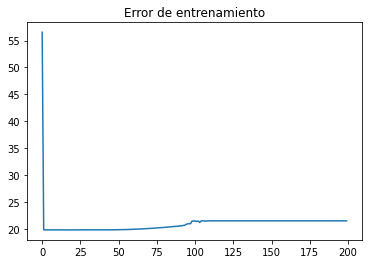

In [212]:
import matplotlib.pyplot as plt
plt.plot(errorVec)
plt.title("Error de entrenamiento")
#sobreaprendizaje o over learning 

In [213]:
import math
def errorRNN(x,t):
  error=0
  emc=0
  for i in range(0,x.shape[0]):
    authuser=0
    xi=x[i]
    ti=t[i]   #añadir entradaNetaCx, pesosCOx, tcx---------------------------------------------------------
    y,entredaNetaCS, entradaNetaC4, entradaNetaC3,entradaNetaC2,entradaNetaC1=neurona(xi,pesosCO1,tc1,pesosCO2,tc2, pesosCO3,tc3,pesosCO4,tc4, pesosCS, tcs)
    
    emc=pow((ti-y),2)/2
    if int(round(y[0],0))!=ti:
      error+=1

  error=(error/x.shape[0])*100

  return error, emc

In [214]:
#  llama la funcion y almacena 
error, emc=errorRNN(x_test, y_test)
print(error,emc)

7.6923076923076925 [1.64893152e-43]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [215]:
#MLPClassifier solver es un algoritmo de opt. se añaden las neuronas 
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(neuronasC1, neuronasC2, neuronasC3,neuronasC4),random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 7, 3, 5), random_state=1,
              solver='lbfgs')

In [216]:
clf.score(x_test, y_test) 
# La mejor puntuación posible es 1,0 y puede ser negativa (porque el modelo puede ser arbitrariamente peor). 
# Un modelo constante que siempre prediga el valor esperado de y, sin tener en cuenta las características de entrada, 
# obtendría una puntuación R^2 de 0,0.

0.9316239316239316